In [5]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
%matplotlib inline

# Pandas

In [9]:
path = os.path.join('datasets', 'weights_heights.csv')
data = pd.read_csv(path, index_col='Index')
data.head()

Height    Weight
Index                    
1      65.78331  112.9925
2      71.51521  136.4873
3      69.39874  153.0269
4      68.21660  142.3354
5      67.78781  144.2971

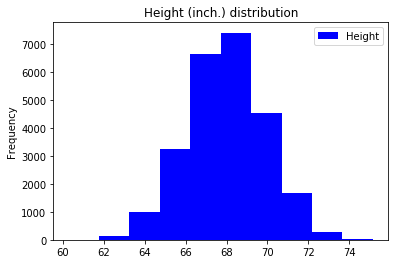

In [10]:
data.plot(
    y='Height',
    kind='hist',
    color='blue',
    title='Height (inch.) distribution'
)

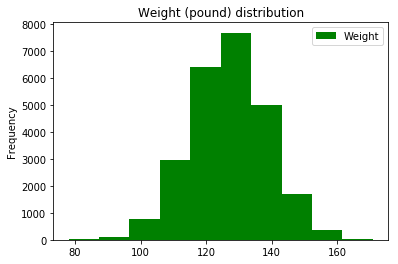

In [11]:
data.plot(
    y='Weight',
    kind='hist',
    color='green',
    title='Weight (pound) distribution'
)

In [13]:
def make_bmi(height_inch, weight_pound):
    """Create BMI.
    
    Args:
        height_inch (float).
        weight_pound (float).
    
    Returns:
        (float): BMI.
        
    """
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [14]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

Plot pair's dependencies: 'Height', 'Weight' и 'BMI'.

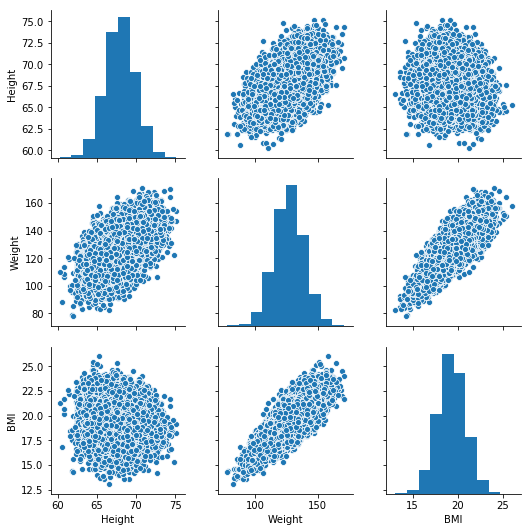

In [16]:
sns.pairplot(data)
plt.show()

Create new feature: *weight_category*:

1 – weight < 120 pounds,

3 - weight >= 150 pounds,

2 – otherwise.

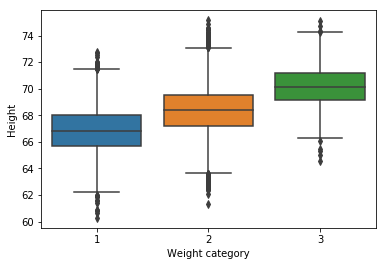

In [19]:
WEIGHT_LOW = 120
WEIGHT_UP = 150
XLABEL = u'Weight category'
YLABEL = u'Height'

def weight_category(weight):
    if weight < WEIGHT_LOW:
        return 1
    elif weight >= WEIGHT_UP:
        return 3
    return 2
    

data['weight_cat'] = data['Weight'].apply(weight_category)

figure = sns.boxplot(
    x="weight_cat",
    y="Height",
    data=data
)
figure.set(xlabel=XLABEL, ylabel=YLABEL)
plt.show()

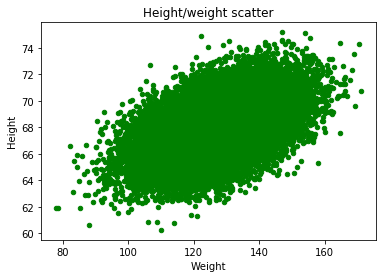

In [20]:
data.plot(
    x='Weight', y='Height', kind='scatter',
    color='green',  title='Height/weight scatter'
)
plt.show()

# Squared error minimization

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$

In [21]:
def y_predict(w0, w1, x):
    """Evaluate predicted y_value.
    
    Args:
        w0 (float).
        w1 (float).
        x (float).
    
    Returns:
        (float): prediction.
        
    """
    return w0 + w1 * x


def error(w0, w1, x, y_actual):
    """Evaluate error of linear regression.
    
    Args:
        w0 (float).
        w1 (float).
        x (float).
        y_actual (float).
        
    Returns:
        (float): squared error.
        
    """
    y = np.array(y_actual)
    x = np.array(x)
    
    return np.sum(
        (y - y_predict(w0, w1, x))**2
    )

Plot predictions for x with the following $w-values$. 

($w_0, w_1) = (60, 0.05)$ and ($w_0, w_1) = (50, 0.16)$.

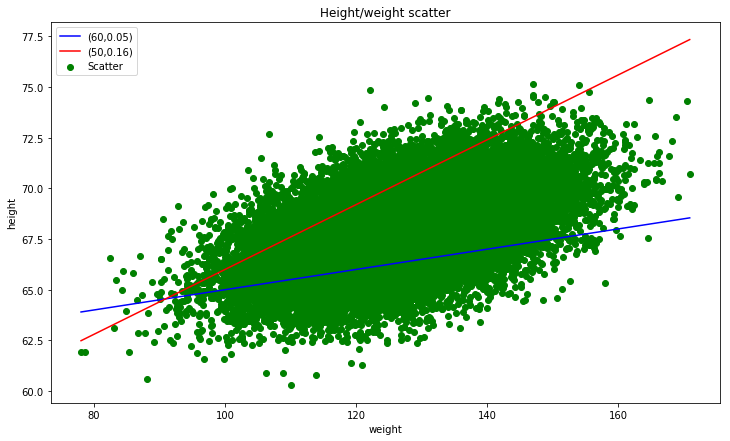

In [22]:
w01, w11 = (60, 0.05)
w02, w12 = (50, 0.16)
X_min = data['Weight'].min()
X_max = data['Weight'].max()
grid_size = data['Weight'].shape[0]
X = np.linspace(X_min, X_max, num=grid_size)

plt.figure(figsize = (12, 7))
plt.title('Height/weight scatter')
plt.scatter(
    x=data['Weight'],
    y=data['Height'],
    color='green',
    label = 'Scatter'
)
plt.plot(
    X,
    y_predict(w01, w11, X),
    linestyle='-',
    color='blue',
    label='(60,0.05)'
)
plt.plot(
    X,
    y_predict(w02, w12, X),
    linestyle='-',
    color='red',
    label='(50,0.16)'
)
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(loc='best')
plt.show()

Let's $w_0 = 50$.

Plot error depend on $w_1$ parameter.

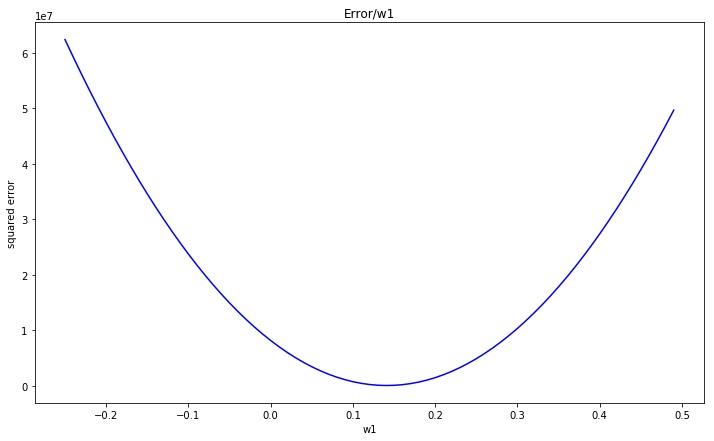

In [24]:
w0 = 50.0
X = np.array(data['Weight'])
Y = np.array(data['Height'])
w1 = np.arange(-0.25, 0.5, 0.01)
errors = []

for w1_i in w1:
    errors.append(error(w0, w1_i, X, Y))
    
plt.figure(figsize = (12, 7))
plt.title('Error/w1')
plt.plot(
    w1,
    errors,
    linestyle='-',
    color='blue',
)
plt.xlabel('w1')
plt.ylabel('squared error')
plt.show()

Minimize function by $w_1$ from [-5, 5].Plot predictions.

In [25]:
res = minimize_scalar(lambda w1: error(w0, w1, X, Y), bounds=(-5.0, 5.0), method='bounded')
w1_opt = res.x
w1_opt

0.14109203728834374

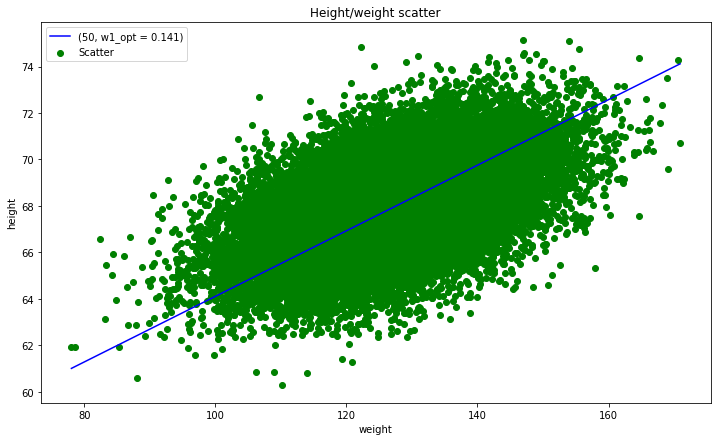

In [26]:
X_min = data['Weight'].min()
X_max = data['Weight'].max()
X = np.linspace(X_min, X_max, num=data['Weight'].shape[0])

plt.figure(figsize = (12, 7))
plt.title('Height/weight scatter')
plt.scatter(
    x=data['Weight'],
    y=data['Height'],
    color='green',
    label = 'Scatter'
)
plt.plot(
    X,
    y_predict(w0, w1_opt, X),
    linestyle='-',
    color='blue',
    label='(50, w1_opt = 0.141)'
)
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(loc='best')
plt.show()

In [27]:
from mpl_toolkits.mplot3d import Axes3D

Plot 3D-graph error dependency on $w_0$ and $w_1$.

In [28]:
STEP = 0.1
X = np.array(data['Weight'])
Y = np.array(data['Height'])

w0 = np.arange(55, 60, STEP)
w1 = np.arange(-1, 1, STEP)
w0_amount = w0.shape[0]
w1_amount = w1.shape[0]
w0, w1 = np.meshgrid(w0, w1)

In [29]:
errors = list()

for w0_coef, w1_coef in zip(w0.flatten(), w1.flatten()):
    errors.append(error(w0_coef, w1_coef, X, Y))

errors = np.array(errors)
errors = errors.reshape(w0.shape)

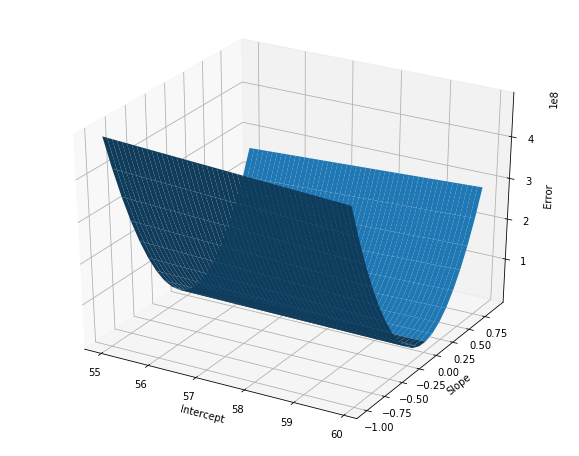

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d') # get current axis
surf = ax.plot_surface(w0, w1, errors)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

Minimize error function:

$w_0 \in [-100,100]$

$w_1 \in [-5, 5]$.

Initial point – ($w_0$, $w_1$) = (0, 0).

In [31]:
def y_predict(w0, w1, x):
    """Evaluate predicted y_value."""
    return w0 + w1 * x


def error(w0, w1, x, y_actual):
    """Evaluate error of linear regression."""
    y = np.array(y_actual)
    x = np.array(x)
    
    return np.sum(
        (y - y_predict(w0, w1, x))**2
    )

In [38]:
x0 = [0, 0]
bounds = ((-100, 100), (-5, 5))

X = np.array(data['Weight'])
Y = np.array(data['Height'])

res = minimize(lambda x: error(x[0], x[1], X, Y), x0, method='L-BFGS-B', bounds=bounds)
w0_opt, w1_opt = res.x
res.x

array([57.57179162,  0.08200637])

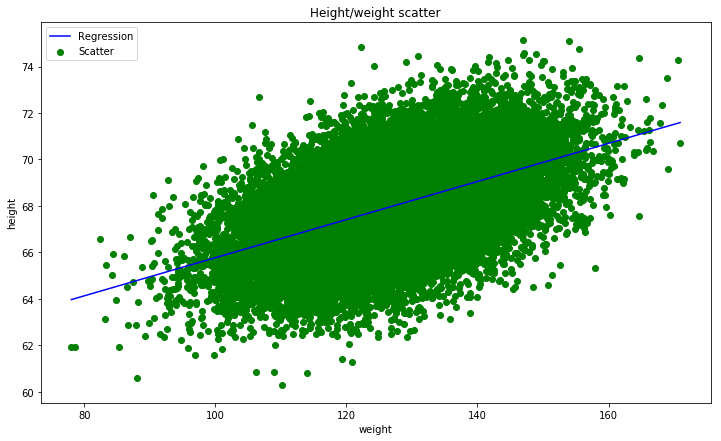

In [39]:
X_min = data['Weight'].min()
X_max = data['Weight'].max()
X = np.linspace(X_min, X_max, num=data['Weight'].shape[0])

plt.figure(figsize = (12, 7))
plt.title('Height/weight scatter')
plt.scatter(
    x=data['Weight'],
    y=data['Height'],
    color='green',
    label = 'Scatter'
)
plt.plot(
    X,
    y_predict(w0_opt, w1_opt, X),
    linestyle='-',
    color='blue',
    label='Regression'
)
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(loc='best')
plt.show()